# Model Selection and Goodness of Fit 
## Part 1 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of [Lecture 4.](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2004.pdf)

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

#Goodness of fit checks

Below are some goodness of fit checks that utilize error penalties and Parameter Penalties

All of which use the residual R

$R = Σ^n_{n=1}(t_i - t_{i,fit})^2 $

$ $

Equations are below

w/

$ n = number \space of \space samples $

$ M = number \space of \space parameters $

1) Method of adjusted residual

$R^2_{adj} = \frac{(n-1)R^2 -(M-1)}{n - M} $

2) Akaike Information Criterion (AIC)

$AIC = n*ln(\frac{R^2}{n}) +2M $

3) Schwarz Information Criterion (BIC)

$AIC = n*ln(\frac{R^2}{n}) +M*ln(n) $

In [ ]:
#@title Fit Check Code
def residual(y,yfit): 

  e = np.square(y-yfit)
  R = np.sum(e)

  return R

def r2Adj(R,M,y): ## Adjusted Residual
  '''
  R - residual
  M - # of parameters
  y - data
  n - number of data points
  '''

  R2 = R**2
  n = len(y)

  return ((n - 1)*R2 - (M - 1))/(n - M)

def AIC(R,M,y): # Akaike Information Criterion
  '''
  R - residual
  M - # of parameters
  y - data
  n - number of data points
  '''
  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + 2*M

def BIC(R2,M,y): # Schwarz Information Criterion
  '''
  R - residual
  M - # of parameters
  y - data
  n - number of data points
  '''

  R2 = R**2
  n = len(y)

  return n*np.log(R2/n) + M*np.log(n)

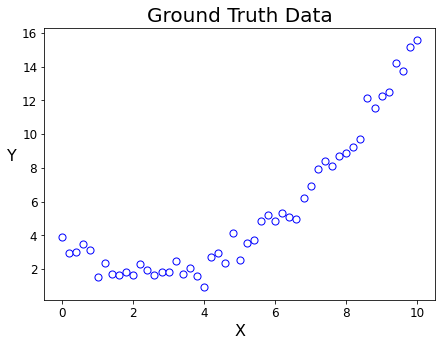

In [ ]:
## Create Random data to use in curve fitting
## The default will be 3rd order polynomial


def createData(order = 3, coeff = [3,-1.2,0.25], 
               n = 51, xlim = [0,10]):
  # parse in the desired order of your function
  # Also, include a list of coeff for the function

  if len(coeff) != order:
    order = len(coeff)

    # if func. order not consistent with coeff list, adjust...
  
  x = np.linspace(xlim[0],xlim[1],n)
  y = np.zeros_like(x)

  for i in range(order):

    y = y + coeff[i]*x**i

  return x,y


def addNoise(y,seed = 0, var = 0.5):

  ## Add some random gaussian noise

  np.random.seed(seed)
  y = y + np.random.normal(0,var,len(y))

  return y

x,y = createData()

y = addNoise(y)

print('\n')
fig1,ax1 = plt.subplots()

fig1.set_size_inches((7,5))
ax1.scatter(x,y,s = 50, edgecolors='blue',c='white')
ax1.set_xlabel('X', fontsize =16)
ax1.set_ylabel('Y',rotation = 'horizontal', fontsize =16,labelpad= 10)
ax1.set_title("Ground Truth Data",fontsize = 20)
ax1.tick_params(axis = 'both', labelsize=12)

plt.show()
print('\n')


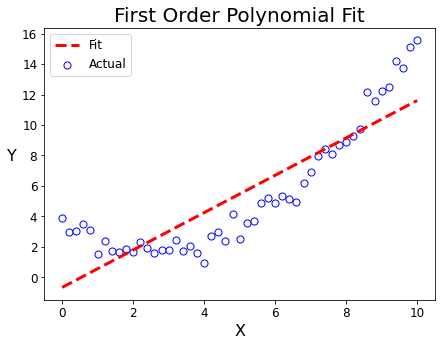

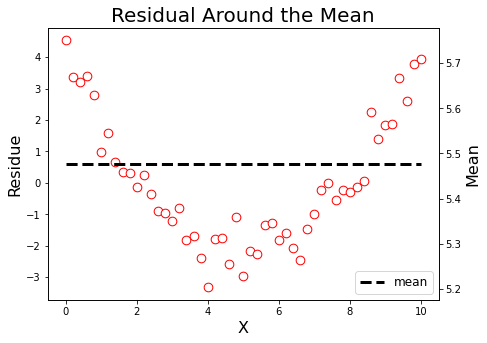

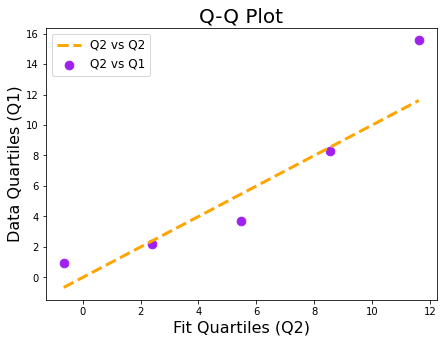



Pearson Correlation Coefficient between x and yfit:  1.0
Pearson Correlation Coefficient between xfit and y:  1.0

Residual:  210.42925165882073

Adjusted Residual:  44280.46995369131

AIC:  347.09014173071506

BIC:  349.0219673634394


In [ ]:
## Now we will try a curve fit with sklearn

# First we define the function we want to optimize

def func1(x,a,b):
  ## first order linear fit

  return a + x*b

popt, pcov = curve_fit(func1, x, y)

# popt returns the coefficients of the function 
# passed into the curve fit function
yfit = func1(x, *popt)

print('\n')
fig1, ax1 = plt.subplots() ## Plot the function against the actual data
fig1.set_size_inches((7,5))
ax1.plot(x, yfit , 'r--',linewidth = 3)
ax1.scatter(x,y,s = 50, edgecolors='blue',c='white')
ax1.legend(["Fit","Actual"],fontsize = 12)
ax1.set_xlabel('X', fontsize =16)
ax1.set_ylabel('Y',rotation = 'horizontal', fontsize =16,labelpad= 10)
ax1.set_title("First Order Polynomial Fit",fontsize = 20)
ax1.tick_params(axis = 'both', labelsize=12)
plt.show()
print('\n')

ymean = np.mean(y) # get the mean of y to see if there is correlation
                   # of the fit around the mean

fig2, ax2 = plt.subplots() ## plot the residuals to see if there is correlation
fig2.set_size_inches((7,5))
ax2.set_title("Residual Around the Mean",fontsize=20)
ax2.scatter(x,y - yfit,s = 75, edgecolors='red',c='white')
ax2.set_ylabel("Residue",fontsize =16)
ax22 = plt.twinx()
ax22.set_ylabel("Mean",fontsize =16)
ax22.plot(x,np.zeros_like(x)+ymean,'k--',linewidth = 3)
ax2.set_xlabel("X",fontsize=16)
ax22.legend(['mean'],loc='lower right',fontsize = 12)
plt.show()
print('\n')

## Calculate the quartiles for a Q-Q plot
q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

fig3,ax3 = plt.subplots() # Create a Q-Q plot to visual fit stats vs data
fig3.set_size_inches((7,5))

ax3.set_title("Q-Q Plot",fontsize=20)

ax3.scatter(q2,q1, c = '#A020F0', s = 75)
ax3.plot(q2,q2,'r--', c =  '#FFA500', linewidth = 3)
ax3.set_xlabel("Fit Quartiles (Q2)",fontsize = 16)
ax3.set_ylabel("Data Quartiles (Q1)",fontsize = 16)

ax3.legend(["Q2 vs Q2","Q2 vs Q1"],fontsize = 12)

plt.show()
print('\n')

## flip x and y, then re-fit
## should be a good fit in both directions

def func1b(y,a,b):
  ## first order fit

  return a + y*b

popt, pcov = curve_fit(func1b, y, x)

xfit = func1b(y, *popt)

## use pearsonr to check fit and flipped fit
bx = stats.pearsonr(x,yfit)
by = stats.pearsonr(y,xfit)

print("Pearson Correlation Coefficient between x and yfit: ",bx[0])
print("Pearson Correlation Coefficient between xfit and y: ",by[0])


## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,1,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,1,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,1,y)

print("\nBIC: ",BC)

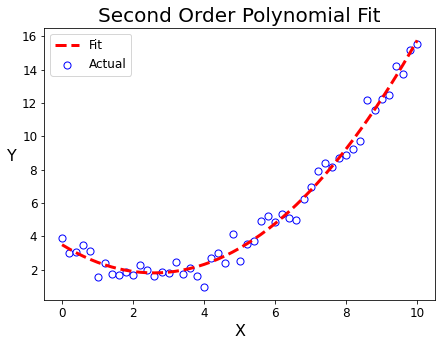

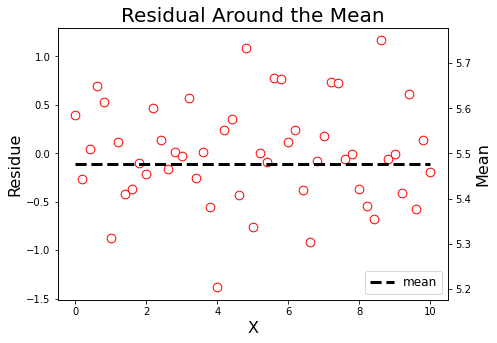

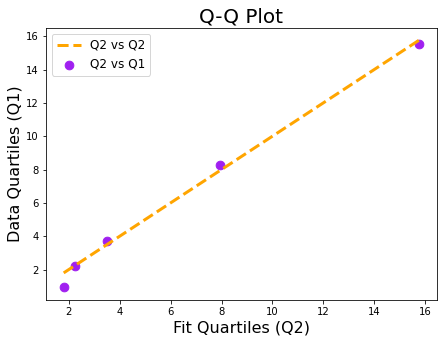



Pearson Correlation Coefficient between x and yfit:  0.8783932059753318
Pearson Correlation Coefficient between xfit and y:  0.9825897010694519

Residual:  13.657168488518076

Adjusted Residual:  190.3043378813991

AIC:  70.13187660407034

BIC:  73.995527869519


In [ ]:
## Now we will try different curve fits with sklearn


def func2(x,a,b,c):
  ## second order fit

  return a + b*x + c*x**2


popt, pcov = curve_fit(func2, x, y)

yfit = func2(x, *popt)
print('\n')
fig1, ax1 = plt.subplots() ## Plot the function against the actual data
fig1.set_size_inches((7,5))
ax1.plot(x, yfit , 'r--',linewidth = 3)
ax1.scatter(x,y,s = 50, edgecolors='blue',c='white')
ax1.legend(["Fit","Actual"],fontsize = 12)
ax1.set_xlabel('X', fontsize =16)
ax1.set_ylabel('Y',rotation = 'horizontal', fontsize =16,labelpad= 10)
ax1.set_title("Second Order Polynomial Fit",fontsize = 20)
ax1.tick_params(axis = 'both', labelsize=12)
plt.show()
print('\n')

ymean = np.mean(y) # get the mean of y to see if there is correlation
                   # of the fit around the mean

fig2, ax2 = plt.subplots() ## plot the residuals to see if there is correlation
fig2.set_size_inches((7,5))
ax2.set_title("Residual Around the Mean",fontsize=20)
ax2.scatter(x,y - yfit,s = 75, edgecolors='red',c='white')
ax2.set_ylabel("Residue",fontsize =16)
ax22 = plt.twinx()
ax22.set_ylabel("Mean",fontsize =16)
ax22.plot(x,np.zeros_like(x)+ymean,'k--',linewidth = 3)
ax2.set_xlabel("X",fontsize=16)
ax22.legend(['mean'],loc='lower right',fontsize = 12)
plt.show()
print('\n')

## Calculate the quartiles for a Q-Q plot
q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

fig3,ax3 = plt.subplots() # Create a Q-Q plot to visual fit stats vs data
fig3.set_size_inches((7,5))

ax3.set_title("Q-Q Plot",fontsize=20)

ax3.scatter(q2,q1, c = '#A020F0', s = 75)
ax3.plot(q2,q2,'r--', c =  '#FFA500', linewidth = 3)
ax3.set_xlabel("Fit Quartiles (Q2)",fontsize = 16)
ax3.set_ylabel("Data Quartiles (Q1)",fontsize = 16)

ax3.legend(["Q2 vs Q2","Q2 vs Q1"],fontsize = 12)

plt.show()
print('\n')

def func2b(y,a,b,c):
  ## second order fit

  return a + b*y + c*y**2

popt, pcov = curve_fit(func2b, y, x)

xfit = func2b(y, *popt)

## use pearsonr to check fit and flipped fit
bx = stats.pearsonr(x,yfit)
by = stats.pearsonr(y,xfit)

print("Pearson Correlation Coefficient between x and yfit: ",bx[0])
print("Pearson Correlation Coefficient between xfit and y: ",by[0])


## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,2,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,2,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,2,y)

print("\nBIC: ",BC)

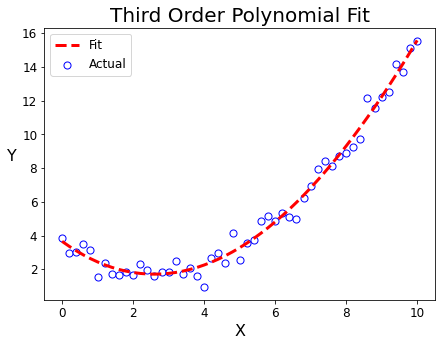

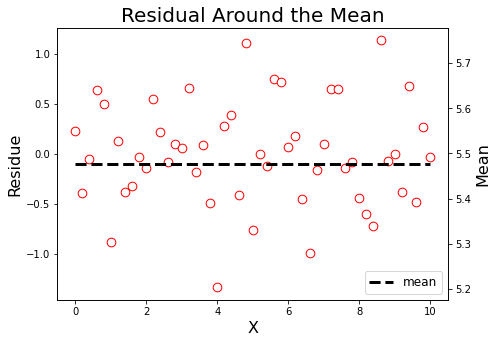

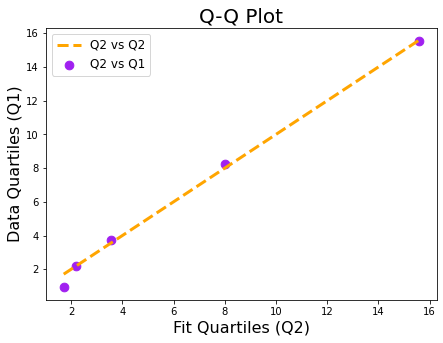



Pearson Correlation Coefficient between x and yfit:  0.878256999494163
Pearson Correlation Coefficient between xfit and y:  0.9805712715794932

Residual:  13.389956417093424

Adjusted Residual:  186.7197217204806

AIC:  70.11639302199059

BIC:  75.91186992016357


In [ ]:
## Finally we will do a 3rd order fit


def func3(x,a,b,c,d):
  ## second order fit

  return a + b*x + c*x**2 + d*x**3


popt, pcov = curve_fit(func3, x, y)

yfit = func3(x, *popt)
print('\n')
fig1, ax1 = plt.subplots() ## Plot the function against the actual data
fig1.set_size_inches((7,5))
ax1.plot(x, yfit , 'r--',linewidth = 3)
ax1.scatter(x,y,s = 50, edgecolors='blue',c='white')
ax1.legend(["Fit","Actual"],fontsize = 12)
ax1.set_xlabel('X', fontsize =16)
ax1.set_ylabel('Y',rotation = 'horizontal', fontsize =16,labelpad= 10)
ax1.set_title("Third Order Polynomial Fit",fontsize = 20)
ax1.tick_params(axis = 'both', labelsize=12)
plt.show()
print('\n')

ymean = np.mean(y) # get the mean of y to see if there is correlation
                   # of the fit around the mean

fig2, ax2 = plt.subplots() ## plot the residuals to see if there is correlation
fig2.set_size_inches((7,5))
ax2.set_title("Residual Around the Mean",fontsize=20)
ax2.scatter(x,y - yfit,s = 75, edgecolors='red',c='white')
ax2.set_ylabel("Residue",fontsize =16)
ax22 = plt.twinx()
ax22.set_ylabel("Mean",fontsize =16)
ax22.plot(x,np.zeros_like(x)+ymean,'k--',linewidth = 3)
ax2.set_xlabel("X",fontsize=16)
ax22.legend(['mean'],loc='lower right',fontsize = 12)
plt.show()
print('\n')

## Calculate the quartiles for a Q-Q plot
q1 = np.quantile(y,[0,0.25,0.5,0.75,1])
q2 = np.quantile(yfit,[0,0.25,0.5,0.75,1]) 

fig3,ax3 = plt.subplots() # Create a Q-Q plot to visual fit stats vs data
fig3.set_size_inches((7,5))

ax3.set_title("Q-Q Plot",fontsize=20)

ax3.scatter(q2,q1, c = '#A020F0', s = 75)
ax3.plot(q2,q2,'r--', c =  '#FFA500', linewidth = 3)
ax3.set_xlabel("Fit Quartiles (Q2)",fontsize = 16)
ax3.set_ylabel("Data Quartiles (Q1)",fontsize = 16)

ax3.legend(["Q2 vs Q2","Q2 vs Q1"],fontsize = 12)

plt.show()
print('\n')

def func3b(y,a,b,c,d):
  ## second order fit

  return a + b*y + c*y**2 + d*y**3

popt, pcov = curve_fit(func3b, y, x)

xfit = func3b(y, *popt)
## use pearsonr to check fit and flipped fit
bx = stats.pearsonr(x,yfit)
by = stats.pearsonr(y,xfit)

print("Pearson Correlation Coefficient between x and yfit: ",bx[0])
print("Pearson Correlation Coefficient between xfit and y: ",by[0])


## calculate residual

R = residual(y,yfit)

print("\nResidual: ", R)

## use residual to calculate adjusted residual

radj = r2Adj(R,3,y)

print("\nAdjusted Residual: ",radj)

## Akaike information criterion

AC = AIC(R,3,y)

print("\nAIC: ",AC)

## Schwartz information criterion

BC = BIC(R,3,y)

print("\nBIC: ",BC)